In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog, minimize, differential_evolution
from dsplot.tree import BinaryTree

In [4]:
# La función objetivo se minimiza, por eso se ponen todos los coeficientes se multiplican por -1
funcion_objetivo = np.array([-3.0, -1.0, -3.0])

Restricciones = np.array(
    [[-1.0, 2.0, 1.0],
     [0.0, 4.0, -3.0],
     [1.0, -3.0, 2.0]]
)
restricciones_valor = np.array([4.0, 2.0, 3.0])

sol_relaxed = linprog(funcion_objetivo, A_ub=Restricciones, b_ub=restricciones_valor)

print("Solución del modelo Relajado:")
print(sol_relaxed.x)
print(sol_relaxed.fun)

sol_int = linprog(funcion_objetivo, A_ub=Restricciones, b_ub=restricciones_valor, integrality=np.ones(3))
print("\nSolución Entera:")
print(sol_int.x)
print(sol_int.fun)

Solución del modelo Relajado:
[5.33333333 3.         3.33333333]
-29.0

Solución Entera:
[5. 2. 2.]
-23.0


In [44]:
# La función objetivo se minimiza, por eso se ponen todos los coeficientes se multiplican por -1
funcion_objetivo = np.array([-6.0, -3.0, -4.0, -5.0])

# todas las restricciones son <= entonces para >= se multiplica por -1 para que sean <= ej. x_2 >= 3 => -x_2 <=

Restricciones = np.array(
    [[6.0, 3.0, 4.0, 1.0],
     [1.0, 2.0, 3.0, 0.0],
     [2.0, 4.0, 1.0, 3.0],
     [3.0, 1.0, 2.0, 4.0],
     [0.0, 1.0, 0.0, 0.0],
     [1.0, 0.0, 0.0, 0.0],
     [0.0, 0.0, 1.0, 0.0],
     [0.0, 0.0, 0.0, -1.0]]
)
restricciones_valor = np.array([19.0, 15.0, 21.0, 13.0, 3.0, 1.0, 0.0, -2.0])

sol_relaxed = linprog(funcion_objetivo, A_ub=Restricciones, b_ub=restricciones_valor)

print("Solución del modelo Relajado:")
print(sol_relaxed.x)
print(sol_relaxed.fun)

sol_int = linprog(funcion_objetivo, A_ub=Restricciones, b_ub=restricciones_valor, integrality=np.ones(4))
print("\nSolución Entera:")
print(sol_int.x)
print(sol_int.fun)

Solución del modelo Relajado:
[0.66666667 3.         0.         2.        ]
-23.0

Solución Entera:
[1. 2. 0. 2.]
-22.0


In [39]:
# La función objetivo se minimiza, por eso se ponen todos los coeficientes se multiplican por -1
funcion_objetivo = np.array([-6.0, -3.0, -4.0, -5.0])

# todas las restricciones son <= entonces para >= se multiplica por -1 para que sean <= ej. x_2 >= 3 => -x_2 <=

Restricciones = np.array(
    [[6.0, 3.0, 4.0, 1.0],
     [1.0, 2.0, 3.0, 0.0],
     [2.0, 4.0, 1.0, 3.0],
     [3.0, 1.0, 2.0, 4.0],
     [0.0, -1.0, 0.0, 0.0],
     [0.0, 0.0, 1.0, 0.0],
     [-1.0, 0.0, 0.0, 0.0]]
)
restricciones_valor = np.array([19.0, 15.0, 21.0, 13.0, -4.0, 2.0, -1.0])

sol_relaxed = linprog(funcion_objetivo, A_ub=Restricciones, b_ub=restricciones_valor)

print("Solución del modelo Relajado:")
print(sol_relaxed.x)
print(sol_relaxed.fun)

sol_int = linprog(funcion_objetivo, A_ub=Restricciones, b_ub=restricciones_valor, integrality=np.ones(4))
print("\nSolución Entera:")
print(sol_int.x)
print(sol_int.fun)

Solución del modelo Relajado:
[ 1.  4. -0.  1.]
-23.0

Solución Entera:
[1. 4. 0. 1.]
-23.0


# Binario

In [63]:
# La función objetivo se minimiza, por eso se ponen todos los coeficientes se multiplican por -1
funcion_objetivo = np.array([-2.0, 1.0, -5.0, -3.0, -4.0])

# todas las restricciones son <= entonces para >= se multiplica por -1 para que sean <= ej. x_2 >= 3 => -x_2 <=

# Estas son las restricciones de desigualdad
Restricciones = np.array(
    [[3.0, -2.0, 7.0, -5.0, 4.0],
     [1.0, -1.0, 2.0, -4.0, 2.0],
     [1.0, 0.0, 0.0, 0.0, 0.0],
     [0.0, 1.0, 0.0, 0.0, 0.0],
     [0.0, 0.0, 1.0, 0.0, 0.0],
     [0.0, 0.0, 0.0, 1.0, 0.0],
     [0.0, 0.0, 0.0, 0.0, 1.0],]
)
restricciones_valor = np.array([6.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0])

# Estas serán las restricciones de igualdad
Restricciones_eq = np.array(
    [[1.0, 0.0, 0.0, 0.0, 0.0],
     [0.0, 1.0, 0.0, 0.0, 0.0],
     [0.0, 0.0, 1.0, 0.0, 0.0],
     [0.0, 0.0, 0.0, 0.0, 1.0]]
)
restricciones_eq_valor = np.array([1.0, 0.0, 1.0, 0.0])
# Soluciones
sol_relaxed = linprog(funcion_objetivo, A_ub=Restricciones, b_ub=restricciones_valor, A_eq=Restricciones_eq, b_eq=restricciones_eq_valor)

print("Solución del modelo Relajado:")
print(sol_relaxed.x)
print(sol_relaxed.fun)

sol_int = linprog(funcion_objetivo, A_ub=Restricciones, b_ub=restricciones_valor, integrality=np.ones(5))
print("\nSolución Entera:")
print(sol_int.x)
print(sol_int.fun)


Solución del modelo Relajado:
[ 1.  0.  1.  1. -0.]
-10.0

Solución Entera:
[0. 0. 1. 1. 1.]
-12.0


# Visualización

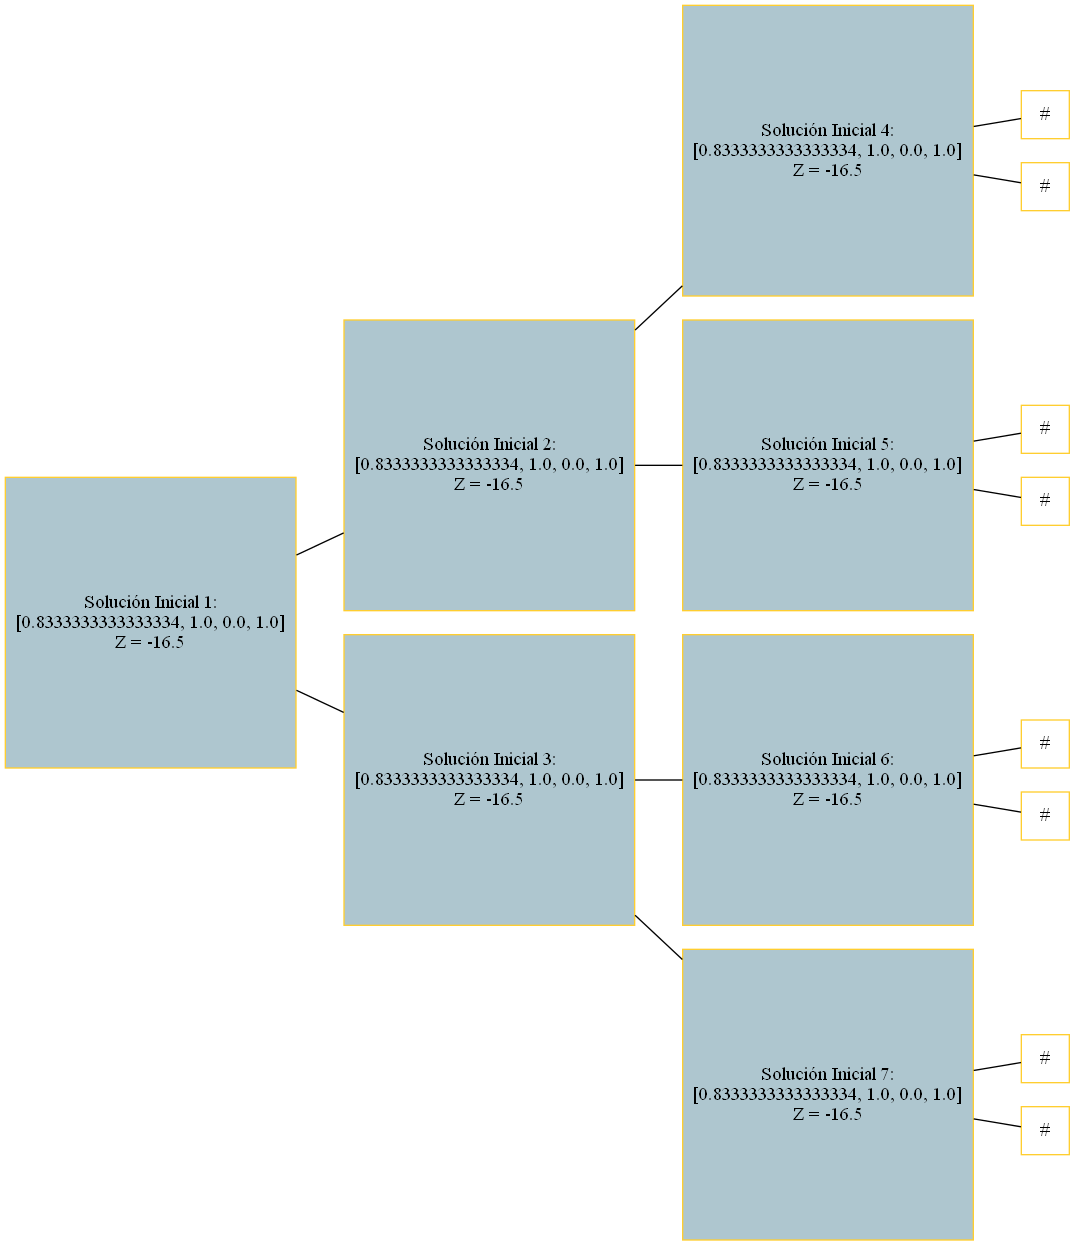

In [3]:
nodos = [f"Solución Inicial 1:\n{sol_relaxed.x.tolist()}\nZ = {sol_relaxed.fun}",
         f"Solución Inicial 2:\n{sol_relaxed.x.tolist()}\nZ = {sol_relaxed.fun}",
         f"Solución Inicial 3:\n{sol_relaxed.x.tolist()}\nZ = {sol_relaxed.fun}",
         f"Solución Inicial 4:\n{sol_relaxed.x.tolist()}\nZ = {sol_relaxed.fun}", 
         f"Solución Inicial 5:\n{sol_relaxed.x.tolist()}\nZ = {sol_relaxed.fun}",
         f"Solución Inicial 6:\n{sol_relaxed.x.tolist()}\nZ = {sol_relaxed.fun}", 
         f"Solución Inicial 7:\n{sol_relaxed.x.tolist()}\nZ = {sol_relaxed.fun}"]
tree = BinaryTree(nodes=nodos)
tree.plot(orientation='LR', border_color='#FFCE30', fill_color='#aec6cf')
from IPython.display import Image, display
im = Image(filename='tree.png')
display(im)
